In [49]:
## Import the library to view the dataset

from osgeo import gdal 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


data = gdal.Open('ETOPO_2022_v1_60s_greenland_surface.tif')
metadata= data.GetMetadata()
print(metadata)

## Read the data set as an array file
data_array = data.GetRasterBand(1).ReadAsArray()

{'AREA_OR_POINT': 'Area', 'DataType': 'Generic'}


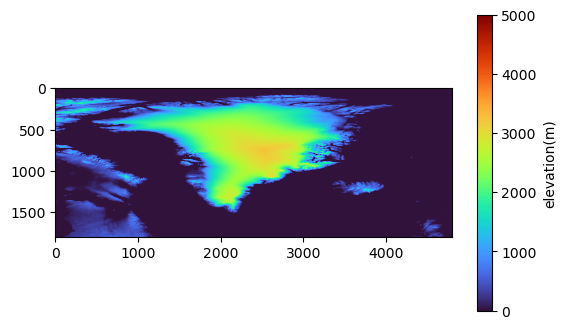

In [65]:
## Plot the figure
plt.Figure(figsize=(10,10))
plt.imshow(data_array,vmin=0, vmax=5000,cmap = 'turbo')
cbar = plt.colorbar(label='elevation(m)',shrink=0.8)


In [48]:
%%bash
gdalinfo 'ETOPO_2022_v1_60s_greenland_surface.tif'

Driver: GTiff/GeoTIFF
Files: ETOPO_2022_v1_60s_greenland_surface.tif
Size is 4800, 1800
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174

In [57]:
prj=data.GetProjection()
print (prj)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [62]:
# Show the available "public" methods and attributes provided by `rioxarray`:
ds = xra.open_dataset('ETOPO_2022_v1_60s_greenland_surface.tif')
print([i for i in dir(ds.rio) if not i.startswith('_')])

['bounds', 'clip', 'clip_box', 'count', 'crs', 'estimate_utm_crs', 'get_gcps', 'grid_mapping', 'height', 'interpolate_na', 'isel_window', 'pad_box', 'reproject', 'reproject_match', 'resolution', 'set_attrs', 'set_crs', 'set_encoding', 'set_spatial_dims', 'shape', 'slice_xy', 'to_raster', 'transform', 'transform_bounds', 'update_attrs', 'update_encoding', 'vars', 'width', 'write_coordinate_system', 'write_crs', 'write_gcps', 'write_grid_mapping', 'write_transform', 'x_dim', 'y_dim']


In [63]:
# Show the available "public" units on `rioxarray`'s `crs` interface
print([i for i in dir(ds.rio.crs) if not i.startswith('_')])

['data', 'from_authority', 'from_dict', 'from_epsg', 'from_proj4', 'from_string', 'from_user_input', 'from_wkt', 'get', 'is_epsg_code', 'is_geographic', 'is_projected', 'is_valid', 'items', 'linear_units', 'linear_units_factor', 'to_authority', 'to_dict', 'to_epsg', 'to_proj4', 'to_string', 'to_wkt', 'units_factor', 'wkt']


In [64]:
print(f'CRS: {ds.rio.crs}')
print(f'Units: {ds.rio.crs.linear_units}')
print(f'Bounds: {ds.rio.bounds()}')
print(f'Height: {ds.rio.height}')
print(f'Width: {ds.rio.width}')
print(f'Grid pixel resolution: {ds.rio.resolution()}')

CRS: EPSG:4326
Units: unknown
Bounds: (-80.0, 54.99999999999999, 7.57900686654267e-15, 85.0)
Height: 1800
Width: 4800
Grid pixel resolution: (0.016666666666666666, -0.016666666666666666)
